In [1]:
import numpy.polynomial.legendre as leg
import numpy as np
import matplotlib.pyplot as plt

# Q.8 : Change of variable.

We shall use the following change of variable :     

$\displaystyle \int_{a}^{b} f(x) \, \mathrm{d}x$ devient :   $\ {\large \frac{b-a}{2}}*\displaystyle \int_{-1}^{1} f(\frac{b-a}{2}x+\frac{a+b}{2}) \, \mathrm{d}x$

# Q.9 MQS Gauss

In [2]:
def gauss_legendre_simple(f, a, b, nodes, weights):
    """
    Approximation de l'intégrale d'une fonction f sur [a, b] en utilisant la méthode de quadrature de Gauss-Legendre.

    Arguments :
    f : Fonction à intégrer.
    a : Limite inférieure de l'intervalle.
    b : Limite supérieure de l'intervalle.
    nodes : Nœuds de la quadrature de Gauss.
    weights : Poids de la quadrature de Gauss.

    Retourne :
    L'approximation de l'intégrale de f sur [a, b].
    """
    I = 0
    def g(x):
        return f((b - a) / 2 * x + (a + b) / 2)
    for i in range(len(nodes)):
        I += (b-a)/2*g(nodes[i]) * weights[i]
    return I


# Q10

In [3]:
def gauss_legendre(n, M, a, b, f):
    """
    Application de la règle composite de Gauss-Legendre sur M sous-intervalles de [a, b].

    Arguments :
    n : Degré de la quadrature de Gauss.
    M : Nombre de sous-intervalles.
    a : Limite inférieure de l'intervalle.
    b : Limite supérieure de l'intervalle.
    f : Fonction à intégrer.

    Retourne :
    L'approximation de l'intégrale de f sur [a, b] en utilisant la règle composite de Gauss-Legendre.
    """
    I = 0
    nodes, weights = leg.leggauss(n)

    for i in range(M):
        I += gauss_legendre_simple(f, a + i * (b - a) / M, a + (i + 1) * (b - a) / M, nodes, weights)

    return I


# Q11. vectorized

In [6]:
def gauss_legendre_vectorized(f, n, M, a, b):
    # Calcul des nœuds et des poids de la quadrature Gauss-Legendre
    nodes, weights = leg.leggauss(n)

    # Calcul de la taille de chaque sous-intervalle
    dx = (b - a) / M

    # Création des bornes inférieures des sous-intervalles
    subinterval_a = np.linspace(a, b - dx, M)

    # Création des bornes supérieures des sous-intervalles
    subinterval_b = subinterval_a + dx

    # Calcul des points échantillonnés dans chaque sous-intervalle
    x_mapped = 0.5 * (subinterval_b[:, np.newaxis] - subinterval_a[:, np.newaxis]) * nodes \
            + 0.5 * (subinterval_b[:, np.newaxis] + subinterval_a[:, np.newaxis])

    # Calcul des valeurs intégrées sur chaque sous-intervalle
    integral = np.sum(weights * f(x_mapped), axis=1) * 0.5 * dx

    # Somme des intégrales calculées sur chaque sous-intervalle pour obtenir l'approximation de l'intégrale sur tout l'intervalle [a, b]
    return np.sum(integral)


# Q12 plot

In [8]:
from scipy.integrate import quad

# Définition de la fonction à intégrer
def f(x):
    return 1 / x

# Limites d'intégration
a = 2
b = 5

# Calcul de l'intégrale
exact_value, _ = quad(f, a, b)

print("Valeur exacte de l'intégrale de 1/x de 2 à 5 :", exact_value)


Valeur exacte de l'intégrale de 1/x de 2 à 5 : 0.9162907318741551


le minimum des erreurs vaut 1e-18


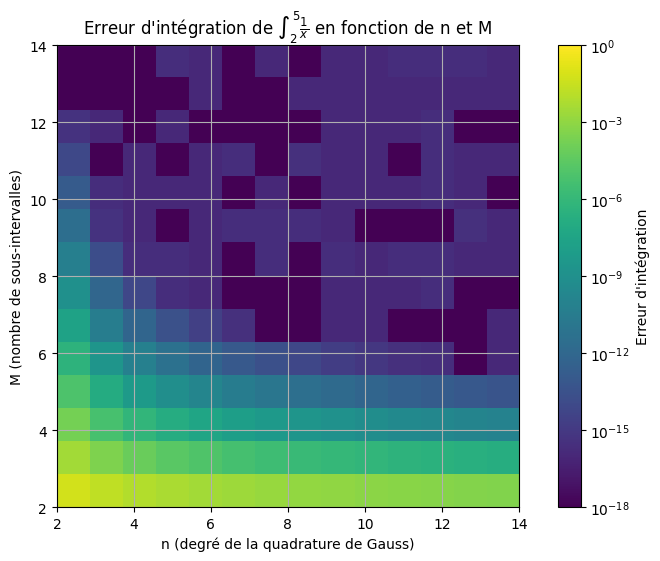

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm  # Importation de LogNorm

# Nombre de degrés de la quadrature de Gauss
n_values = np.arange(1, 15, 1)

# Nombre de sous-intervalles
M_values = np.arange(1, 15, 1)

# Déterminer les valeurs maximales de n et M
max_n = max(n_values)
max_M = max(M_values)

# Initialisation d'un tableau pour stocker les erreurs
errors = np.zeros((len(n_values), len(M_values)))

# Boucle pour calculer l'erreur pour chaque combinaison de n et M
for i, n in enumerate(n_values):
    for j, M in enumerate(M_values):
        # Approximation de l'intégrale avec la méthode de quadrature Gauss-Legendre
        approx_value = gauss_legendre(n, M, a, b, f)

        # Calcul de l'erreur absolue entre l'approximation et la valeur exacte
        errors[i, j] = np.abs(approx_value - exact_value)

        # Correction de l'erreur nulle ( l'erreur nulle n'est pas nulle mais simpplement inférieur à 10^18 sur python) pour éviter les carrés blancs sur le graphe
        if errors[i, j] == 0:
            errors[i, j] = 10**(-18)

# Trouver la valeur minimale de l'erreur
min_error = np.min(errors)
print("le minimum des erreurs vaut", min_error)

# Tracé de l'erreur en fonction de n et M avec colormap logarithmique
plt.figure(figsize=(10, 6))
plt.imshow(errors, origin='lower', extent=[2, max_n, 2, max_M], cmap='viridis', norm=LogNorm(vmin=10**(-18), vmax=1))
plt.colorbar(label='Erreur d\'intégration')
plt.xlabel('n (degré de la quadrature de Gauss)')
plt.ylabel('M (nombre de sous-intervalles)')
plt.title('Erreur d\'intégration de $\\int_{2}^{5} \\frac{1}{x}$ en fonction de n et M')
plt.grid(True)
plt.show()


# Q13  TRAPEZOIDAL

In [10]:
def trapezoidal_simple(f, a, b):
    """
    Approximation de l'intégrale d'une fonction f sur [a, b] en utilisant la méthode de quadrature des trapèzes.

    Arguments :
    f : Fonction à intégrer.
    a : Limite inférieure de l'intervalle.
    b : Limite supérieure de l'intervalle.
    Retourne :
    L'approximation de l'intégrale de f sur [a, b].
    """
    I = (b-a)*((1/2)*f(a)+(1/2)*f(b))
    return I

In [11]:
def trapezoidal_composite(f,a,b,M):
    """
    Application de la règle composite de Gauss-Legendre sur M sous-intervalles de [a, b].

    Arguments :
    M : Nombre de sous-intervalles.
    a : Limite inférieure de l'intervalle.
    b : Limite supérieure de l'intervalle.
    f : Fonction à intégrer.

    Retourne :
    L'approximation de l'intégrale de f sur [a, b] en utilisant la règle composite de Gauss-Legendre.
    """
    I = 0
    for i in range(M):
        I += trapezoidal_simple(f, a + i * (b - a) / M, a + (i + 1) * (b - a) / M)

    return I

le minimum des erreurs vaut 1.5781543327708647e-07


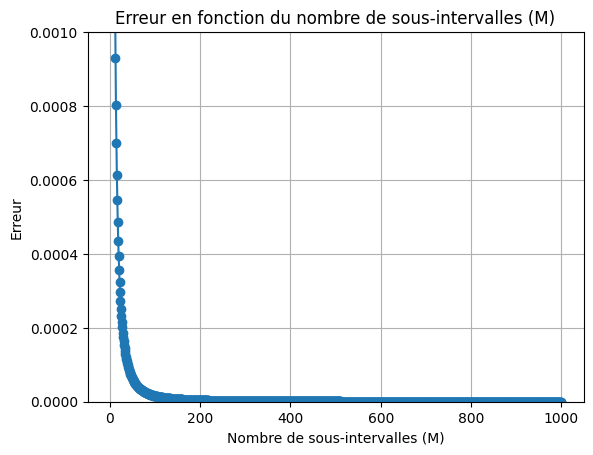

In [13]:
# Nombre de degrés de la quadrature de Gauss


# Nombre de sous-intervalles
M_values_trap = np.arange(1, 1000,1)

# Calcul de l'erreur pour chaque combinaison de n et M
errors = np.zeros(len(M_values_trap))

for j, M in enumerate(M_values_trap):
        approx_value = trapezoidal_composite(f,a,b,M)
        errors[j] = np.abs(approx_value - exact_value)



# Tracer l'erreur en fonction de M
plt.plot(M_values_trap, errors, marker='o', linestyle='-')
plt.xlabel('Nombre de sous-intervalles (M)')
plt.ylabel('Erreur')
plt.title("Erreur en fonction du nombre de sous-intervalles (M)")
plt.grid(True)

# Définir les limites de l'axe M pour zoomer sur les valeurs entre 0 et 0.1
plt.ylim(0, 0.001)
min_error = np.min(errors)
print("le minimum des erreurs vaut",min_error)

plt.show()


# Q14. Comparaison de méthodes de quadratures

In [12]:
def middle_point_simple(f, a, b):
    """
    Approximation de l'intégrale d'une fonction f sur [a, b] en utilisant la méthode de quadrature des trapèzes.

    Arguments :
    f : Fonction à intégrer.
    a : Limite inférieure de l'intervalle.
    b : Limite supérieure de l'intervalle.
    Retourne :
    L'approximation de l'intégrale de f sur [a, b].
    """
    I = (b-a)*f((a+b)/2)
    return I

def middle_point(f,a,b,M):
    """
    Application de la règle composite de Gauss-Legendre sur M sous-intervalles de [a, b].

    Arguments :
    M : Nombre de sous-intervalles.
    a : Limite inférieure de l'intervalle.
    b : Limite supérieure de l'intervalle.
    f : Fonction à intégrer.

    Retourne :
    L'approximation de l'intégrale de f sur [a, b] en utilisant la règle composite de Gauss-Legendre.
    """
    I = 0
    for i in range(M):
        I += middle_point_simple(f, a + i * (b - a) / M, a + (i + 1) * (b - a) / M)

    return I

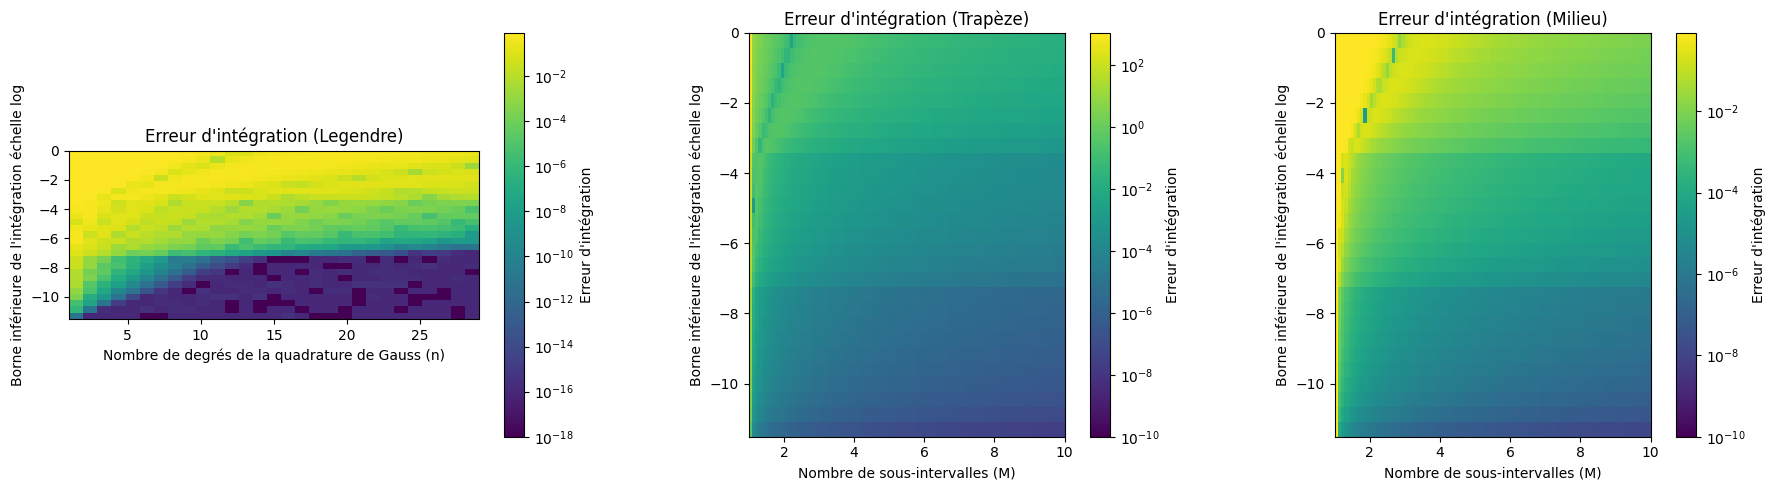

In [14]:
from scipy.stats import norm  # Importation de la fonction de distribution normale
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm  # Importation de LogNorm pour la représentation logarithmique des données

# Définition de la fonction gaussienne centrée réduite
def normal(x):
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

a = 1.0  # Borne supérieure de l'intégration

# Calcul de la valeur exacte de l'intégrale sur [-∞, a] de la gaussienne centrée réduite
exact_value = norm.cdf(a)

n_value = 20  # Nombre de degrés pour la quadrature de Gauss

# Définition des valeurs pour les sous-intervalles et les bornes inférieures
M_values_leg = np.arange(1, 30)
M_values = np.arange(1, 10000, 100)
borne_inf_values_1 = np.arange(-10, -100, -10)
borne_inf_values_2 = np.arange(-100, -1000, -100)
borne_inf_values_3 = np.arange(-1000, -10000, -1000)
borne_inf_values = np.concatenate([borne_inf_values_1, borne_inf_values_2, borne_inf_values_3])

min_log, max_log = -np.log(10**(5)), -np.log(1)  # Définition des bornes pour l'échelle logarithmique

# Initialisation des tableaux pour stocker les erreurs
errors_leg = np.zeros((len(borne_inf_values), len(M_values_leg)))
errors_trap = np.zeros((len(borne_inf_values), len(M_values)))
errors_mid = np.zeros((len(borne_inf_values), len(M_values)))

# Calcul des erreurs pour chaque combinaison de M et de borne inférieure pour les trois méthodes d'intégration
for i, M in enumerate(M_values_leg):
    for j, borne in enumerate(borne_inf_values):
        # Calcul de l'erreur pour la méthode de Gauss-Legendre
        approx_value = gauss_legendre(n_value, M, borne, a, normal)
        errors_leg[j, i] = np.abs(approx_value - exact_value)
        if errors_leg[j, i] == 0:
            errors_leg[j, i] = 10**(-18)

for j, M in enumerate(M_values):
    for k, borne in enumerate(borne_inf_values):
        # Calcul de l'erreur pour la méthode du trapèze
        approx_value = trapezoidal_composite(normal, borne, a, M)
        errors_trap[k, j] = np.abs(approx_value - exact_value)

        # Calcul de l'erreur pour la méthode du point milieu
        approx_value = middle_point(normal, borne, a, M)
        errors_mid[k, j] = np.abs(approx_value - exact_value)

# Tracé des erreurs en fonction de M et de la borne inférieure pour les trois méthodes
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.imshow(errors_leg, origin='lower', extent=[min(M_values_leg), max(M_values_leg), min_log, max_log*2], cmap='viridis', norm=LogNorm(vmin=1e-18))
plt.colorbar(label='Erreur d\'intégration')
plt.xlabel('Nombre de degrés de la quadrature de Gauss (n)')
plt.ylabel('Borne inférieure de l\'intégration échelle log')
plt.title('Erreur d\'intégration (Legendre)')

plt.subplot(1, 3, 2)
plt.imshow(errors_trap, origin='lower', extent=[min(M_values), 10, min_log, max_log], cmap='viridis', norm=LogNorm(vmin=1e-10))
plt.colorbar(label='Erreur d\'intégration')
plt.xlabel('Nombre de sous-intervalles (M)')
plt.ylabel('Borne inférieure de l\'intégration échelle log')
plt.title('Erreur d\'intégration (Trapèze)')

plt.subplot(1, 3, 3)
plt.imshow(errors_mid, origin='lower', extent=[min(M_values), 10, min_log, max_log], cmap='viridis', norm=LogNorm(vmin=1e-10))
plt.colorbar(label='Erreur d\'intégration')
plt.xlabel('Nombre de sous-intervalles (M)')
plt.ylabel('Borne inférieure de l\'intégration échelle log')
plt.title('Erreur d\'intégration (Milieu)')

plt.tight_layout()
plt.show()
